In [ ]:
OLS and Redge Regression on Diabetes data set

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True) # load the diabetes dataset
X = X[:,[2]] # use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=True) # split into training and test sets

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X_train, y_train) # fit the model to the training data

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = regressor.predict(X_test) # predict the target values for the test set
print(f"mean squared error: {mean_squared_error(y_test, y_pred):.2f}") # print the mean squared error
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}") # print the coefficient of determination

mean squared error: 3416.04
Coefficient of determination: 0.35


Plotting the results on the train and test data

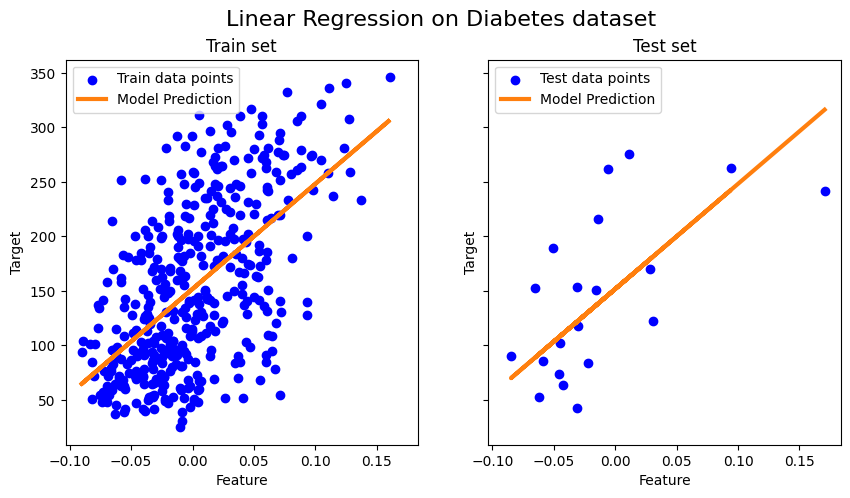

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)# create subplots
ax[0].scatter(X_train, y_train, color='blue', label='Train data points') # plot training data points
ax[0].plot(X_train, regressor.predict(X_train), linewidth=3, color='tab:orange', label='Model Prediction') # plot regression line]
ax[0].set(xlabel='Feature', ylabel='Target', title='Train set') # set labels and title
ax[0].legend()

ax[1].scatter(X_test, y_test, color='blue', label='Test data points') # plot test data points
ax[1].plot(X_test, y_pred, linewidth=3, color='tab:orange', label='Model Prediction') # plot regression line
ax[1].set(xlabel='Feature', ylabel='Target', title='Test set') # set labels and title
ax[1].legend()

fig.suptitle('Linear Regression on Diabetes dataset', fontsize=16) # set the main title

plt.show() # display the plots

OLS and Ridge Variance using tiny synthetic data sets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

X_train = np.c_[0.5, 1].T # training data
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0) # set random seed for reproducibility

classifiers = dict(ols=linear_model.LinearRegression(), ridge=linear_model.Ridge(alpha=0.1)) # define the models

for name, clf in classifiers.items(): # iterate over the models
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6): # fit the model multiple times to see the effect of noise
        this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train# add noise to the training data
        clf.fit(this_X, y_train) # fit the model

        ax.plot(X_test, clf.predict(X_test), color='gray') # plot the regression line
    ax.scatter(X_train, y_train, s=30, color='red', zorder=3) # plot the training data points
